## LOAD REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# LOAD DATA

In [3]:
dataset = pd.read_csv('QVI_data.csv')
dataset.head(10)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium
9,1010,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream


In [4]:
dataset.describe(include='all')

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
count,2.648340e+05,264834,264834.000000,2.648340e+05,264834.000000,264834,264834.000000,264834.000000,264834.000000,264834,264834,264834
unique,NaN,364,NaN,NaN,NaN,114,NaN,NaN,NaN,21,7,3
top,NaN,2018-12-24,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN,KETTLE,OLDER SINGLES/COUPLES,Mainstream
freq,NaN,939,NaN,NaN,NaN,3304,NaN,NaN,NaN,41288,54479,101988
mean,1.355488e+05,NaN,135.079423,1.351576e+05,56.583554,NaN,1.905813,7.299346,182.425512,NaN,NaN,NaN
std,8.057990e+04,NaN,76.784063,7.813292e+04,32.826444,NaN,0.343436,2.527241,64.325148,NaN,NaN,NaN
min,1.000000e+03,NaN,1.000000,1.000000e+00,1.000000,NaN,1.000000,1.500000,70.000000,NaN,NaN,NaN
25%,7.002100e+04,NaN,70.000000,6.760050e+04,28.000000,NaN,2.000000,5.400000,150.000000,NaN,NaN,NaN
50%,1.303570e+05,NaN,130.000000,1.351365e+05,56.000000,NaN,2.000000,7.400000,170.000000,NaN,NaN,NaN
75%,2.030940e+05,NaN,203.000000,2.026998e+05,85.000000,NaN,2.000000,9.200000,175.000000,NaN,NaN,NaN


## DATA DESCRIPTION

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


## CREATE MONTH_YEAR COLUMN

In [6]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'], format='%Y-%m-%d')
dataset.set_index('DATE', inplace=True)
dataset['MONTH_YEAR'] = dataset.index.month.astype(str) +'-'+ dataset.index.year.astype(str)
dataset['MONTH_YEAR'] = pd.to_datetime(dataset['MONTH_YEAR'], format='%m-%Y')
dataset.head(10)

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_YEAR
DATE,,,,,,,,,,,,
2018-10-17,1000,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10-01
2018-09-16,1002,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09-01
2019-03-07,1003,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03-01
2019-03-08,1003,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03-01
2018-11-02,1004,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11-01
2018-12-28,1005,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,2018-12-01
2018-12-04,1007,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget,2018-12-01
2018-12-05,1007,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget,2018-12-01
2018-11-20,1009,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium,2018-11-01


## CREATE METRICS OF INTEREST

In [7]:
store_mdata = pd.DataFrame()
for store_id in dataset['STORE_NBR'].unique():
    store_id_data = dataset[dataset['STORE_NBR']==store_id]
    store_info = pd.DataFrame(store_id_data.groupby(['MONTH_YEAR', 'STORE_NBR'])['TOT_SALES'].sum()).reset_index()
    store_info['CUSTOMERS'] = list(store_id_data.groupby('MONTH_YEAR')['LYLTY_CARD_NBR'].nunique())
    store_info['TXNS'] = list(store_id_data.groupby('MONTH_YEAR')['TXN_ID'].nunique())
    store_info['AV_TXN'] = store_info['TXNS']/store_info['CUSTOMERS']
    store_info['CHIP_QTY'] = list(store_id_data.groupby('MONTH_YEAR')['PROD_QTY'].sum())
    store_info['AV_CHIP_QTY'] = store_info['CHIP_QTY']/store_info['TXNS']
    store_info['AV_PRICE'] = store_info['TOT_SALES']/store_info['CHIP_QTY']
    store_mdata = pd.concat([store_mdata, store_info], axis=0, ignore_index=True)

# store_mdata['AV_TXN'] = store_mdata['TXNS']/store_mdata['CUSTOMERS']
store_mdata.head(100)

,MONTH_YEAR,STORE_NBR,TOT_SALES,CUSTOMERS,TXNS,AV_TXN,CHIP_QTY,AV_CHIP_QTY,AV_PRICE
0,2018-07-01,1,206.90,49,52,1.061224,62,1.192308,3.337097
1,2018-08-01,1,176.10,42,43,1.023810,54,1.255814,3.261111
2,2018-09-01,1,278.80,59,62,1.050847,75,1.209677,3.717333
3,2018-10-01,1,188.10,44,45,1.022727,58,1.288889,3.243103
4,2018-11-01,1,192.60,46,47,1.021739,57,1.212766,3.378947
5,2018-12-01,1,189.60,42,47,1.119048,57,1.212766,3.326316
6,2019-01-01,1,154.80,35,36,1.028571,42,1.166667,3.685714
7,2019-02-01,1,225.40,52,55,1.057692,65,1.181818,3.467692
8,2019-03-01,1,192.90,45,49,1.088889,58,1.183673,3.325862
9,2019-04-01,1,192.90,42,43,1.023810,57,1.325581,3.384211


## CHECK FOR STORES WITH 12 MONTHS WORTH OF DATA

In [8]:
store_12months = pd.DataFrame()
for store_period in store_mdata['STORE_NBR'].unique():
    store_pdata = store_mdata[store_mdata['STORE_NBR']==store_period]
    if list(store_pdata.groupby('STORE_NBR')['MONTH_YEAR'].count())[0] == 12:
        store_12months = pd.concat([store_12months, store_pdata], axis=0, ignore_index=True)

store_12months.head(100)

,MONTH_YEAR,STORE_NBR,TOT_SALES,CUSTOMERS,TXNS,AV_TXN,CHIP_QTY,AV_CHIP_QTY,AV_PRICE
0,2018-07-01,1,206.90,49,52,1.061224,62,1.192308,3.337097
1,2018-08-01,1,176.10,42,43,1.023810,54,1.255814,3.261111
2,2018-09-01,1,278.80,59,62,1.050847,75,1.209677,3.717333
3,2018-10-01,1,188.10,44,45,1.022727,58,1.288889,3.243103
4,2018-11-01,1,192.60,46,47,1.021739,57,1.212766,3.378947
5,2018-12-01,1,189.60,42,47,1.119048,57,1.212766,3.326316
6,2019-01-01,1,154.80,35,36,1.028571,42,1.166667,3.685714
7,2019-02-01,1,225.40,52,55,1.057692,65,1.181818,3.467692
8,2019-03-01,1,192.90,45,49,1.088889,58,1.183673,3.325862
9,2019-04-01,1,192.90,42,43,1.023810,57,1.325581,3.384211


## SELECT PRE-FEBRUARY DATA

In [9]:
store_prefeb = store_12months[store_12months['MONTH_YEAR'] <'2019-02-01']

In [10]:
import scipy.stats as stats
# overall_pearson_r = store_prefeb.corr().iloc[0,1]
# overall_pearson_r
trial_stores = [77, 86, 88]
control_stores = [x for x in store_prefeb['STORE_NBR'].unique() if x not in trial_stores]
metric_col = ['TOT_SALES', 'CUSTOMERS']

In [11]:
def correlation_comparism(k, control_stores, metric_col):   
    metric_table = pd.DataFrame()
    metric_res = []
    for i in metric_col:
        metric_row = []
        metric_res = []
        for j in control_stores:
            corr, p_value = stats.spearmanr(store_prefeb[store_prefeb['STORE_NBR']==k][i],
                                            store_prefeb[store_prefeb['STORE_NBR']==j][i])
            metric_row.append(j)
            metric_res.append(corr)
        metric_table = pd.concat([metric_table, pd.Series(metric_res)], axis=1, ignore_index=True)

    metric_table.columns = metric_col
    metric_table.index = metric_row
    metric_table['SCORE'] = metric_table.mean(axis=1)
    return metric_table.sort_values(['SCORE'], ascending=False)

In [12]:
corr_77 = correlation_comparism(77, control_stores, metric_col)
corr_77.head(5)

,TOT_SALES,CUSTOMERS,SCORE
233,0.928571,0.991031,0.959801
119,0.785714,0.991031,0.888373
254,0.857143,0.892857,0.875000
162,0.821429,0.750000,0.785714
113,0.678571,0.857143,0.767857


In [13]:
corr_86 = correlation_comparism(86, control_stores, metric_col)
corr_86.head(5)

,TOT_SALES,CUSTOMERS,SCORE
155,0.821429,0.981818,0.901623
240,0.857143,0.774806,0.815975
114,0.821429,0.792825,0.807127
109,0.750000,0.745455,0.747727
222,0.714286,0.763636,0.738961


In [14]:
corr_88 = correlation_comparism(88, control_stores, metric_col)
corr_88.head(5)

,TOT_SALES,CUSTOMERS,SCORE
178,0.785714,0.846881,0.816298
14,0.642857,0.898177,0.770517
253,0.892857,0.594619,0.743738
204,0.678571,0.600099,0.639335
187,0.571429,0.594619,0.583024


In [15]:
def magnitude_distance(df1, df2, cols):
#     dist = []
#     for i in cols:
    abs_dist = abs(df1[cols].reset_index() - df2[cols].reset_index())
#         abs_dist = abs(df1[i].reset_index() - df2[i].reset_index())
    abs_dist.drop('index',axis=1,inplace=True)
#         dist.append(np.linalg.norm(df1[i].values - df2[i].values))
    return abs_dist[cols[0]].mean(), abs_dist[cols[1]].mean()

def distance_comparism(k, control_stores, metric_col):

    metric_table = pd.DataFrame()
    metric_res1 = []
    metric_res2 = []
    metric_row = []

    for i in control_stores:
        distance1, distance2 = magnitude_distance(store_prefeb[store_prefeb['STORE_NBR']==k],
                                            store_prefeb[store_prefeb['STORE_NBR']==i], metric_col)
        metric_row.append(i)
        metric_res1.append(distance1)
        metric_res2.append(distance2)
    metric_table = pd.concat([pd.Series(metric_res1), pd.Series(metric_res2)], axis=1, ignore_index=True)

    metric_table.columns = metric_col
    metric_table.index = metric_row
    metric_table['SCORE'] = metric_table.mean(axis=1)
    return metric_table.sort_values(['SCORE'], ascending=True)

In [36]:
dist_77 = distance_comparism(77, control_stores, metric_col)
scale_77 = 1-(dist_77 - dist_77.min())/(dist_77.max() - dist_77.min())
scale_77.head(5)

,TOT_SALES,CUSTOMERS,SCORE
233,1.000000,1.000000,1.000000
255,0.991889,0.936728,0.987942
188,0.989784,0.950617,0.986982
53,0.988642,0.962963,0.986805
46,0.988012,0.966049,0.986440


In [37]:
dist_86 = distance_comparism(86, control_stores, metric_col)
scale_86 = 1-(dist_86 - dist_86.min())/(dist_86.max() - dist_86.min())
scale_86.head(5)

,TOT_SALES,CUSTOMERS,SCORE
155,0.998964,1.000000,1.000000
109,1.000000,0.980333,0.998913
225,0.992833,0.980333,0.992471
222,0.994853,0.931921,0.989320
229,0.982764,0.974281,0.982801


In [38]:
dist_88 = distance_comparism(88, control_stores, metric_col)
scale_88 = 1-(dist_88 - dist_88.min())/(dist_88.max() - dist_88.min())
scale_88.head(5)

,TOT_SALES,CUSTOMERS,SCORE
237,1.000000,1.000000,1.000000
203,0.993943,0.953737,0.990449
40,0.980578,0.951364,0.978034
199,0.963659,0.940688,0.961653
165,0.956869,0.944247,0.955760


In [40]:
def total_score(corr_data, smd_data):
    #After merging all 4 scores
    score_table = pd.concat([corr_data.drop('SCORE', axis=1),smd_data.drop('SCORE', axis=1)],axis=1)
    #Calculating total score
    score_table['TOTAL_SCORE'] = score_table.mean(axis=1)
    #Maximum score
    store_nbr = score_table[score_table['TOTAL_SCORE']==score_table['TOTAL_SCORE'].max()].index[0]
    return store_nbr

In [41]:
total_score(corr_77, scale_77)

233

In [42]:
total_score(corr_86, scale_86)

155

In [43]:
total_score(corr_88, scale_88)

178

In [44]:
#### Create a combined score composed of correlation and magnitude
corr_weight = 0.5
def total_score(corr_data, smd_data):
    score_table = pd.merge(corr_data.drop('SCORE',axis=1), smd_data.drop('SCORE',axis=1), 
                           left_on=corr_data.index, right_on=smd_data.index, suffixes=('_corr', '_smd'))
    score_table['SCORE_SALES'] = (score_table['TOT_SALES_corr']*corr_weight)+(score_table['TOT_SALES_smd']*(1-corr_weight))
    score_table['SCORE_CUST'] = (score_table['CUSTOMERS_corr']*corr_weight)+(score_table['CUSTOMERS_smd']*(1-corr_weight))
    score_table['TOTAL_SCORE'] = (score_table['SCORE_CUST'] * 0.5)+(score_table['SCORE_SALES'] * 0.5)
#     return score_table[score_table['TOTAL_SCORE']==score_table['TOTAL_SCORE'].max()].index[0]
    return score_table.sort_values('TOTAL_SCORE', ascending=False)

In [53]:
total_score(corr_77, scale_77).head(5)

,key_0,TOT_SALES_corr,CUSTOMERS_corr,TOT_SALES_smd,CUSTOMERS_smd,SCORE_SALES,SCORE_CUST,TOTAL_SCORE
0,233,0.928571,0.991031,1.000000,1.000000,0.964286,0.995516,0.979901
2,254,0.857143,0.892857,0.931544,0.941358,0.894344,0.917108,0.905726
6,50,0.750000,0.745578,0.986775,0.927469,0.868388,0.836523,0.852455
9,41,0.750000,0.684712,0.977927,0.981481,0.863963,0.833097,0.848530
7,115,0.750000,0.714286,0.942700,0.970679,0.846350,0.842482,0.844416


In [46]:
total_score(corr_86, scale_86).head(5)

,key_0,TOT_SALES_corr,CUSTOMERS_corr,TOT_SALES_smd,CUSTOMERS_smd,SCORE_SALES,SCORE_CUST,TOTAL_SCORE
0,155,0.821429,0.981818,0.998964,1.000000,0.910196,0.990909,0.950553
2,114,0.821429,0.792825,0.955087,0.948563,0.888258,0.870694,0.879476
3,109,0.750000,0.745455,1.000000,0.980333,0.875000,0.862894,0.868947
4,222,0.714286,0.763636,0.994853,0.931921,0.854569,0.847779,0.851174
5,138,0.714286,0.756787,0.959103,0.940998,0.836694,0.848893,0.842794


In [47]:
total_score(corr_88, scale_88).head(5)

,key_0,TOT_SALES_corr,CUSTOMERS_corr,TOT_SALES_smd,CUSTOMERS_smd,SCORE_SALES,SCORE_CUST,TOTAL_SCORE
0,178,0.785714,0.846881,0.725911,0.829181,0.755813,0.838031,0.796922
5,203,0.714286,0.428571,0.993943,0.953737,0.854114,0.691154,0.772634
8,237,0.107143,0.964286,1.000000,1.000000,0.553571,0.982143,0.767857
10,201,0.678571,0.360375,0.912115,0.931198,0.795343,0.645787,0.720565
14,123,0.428571,0.535714,0.895072,0.905101,0.661822,0.720408,0.691115


In [54]:
store_premarch = store_12months[store_12months['MONTH_YEAR'] <'2019-03-01']

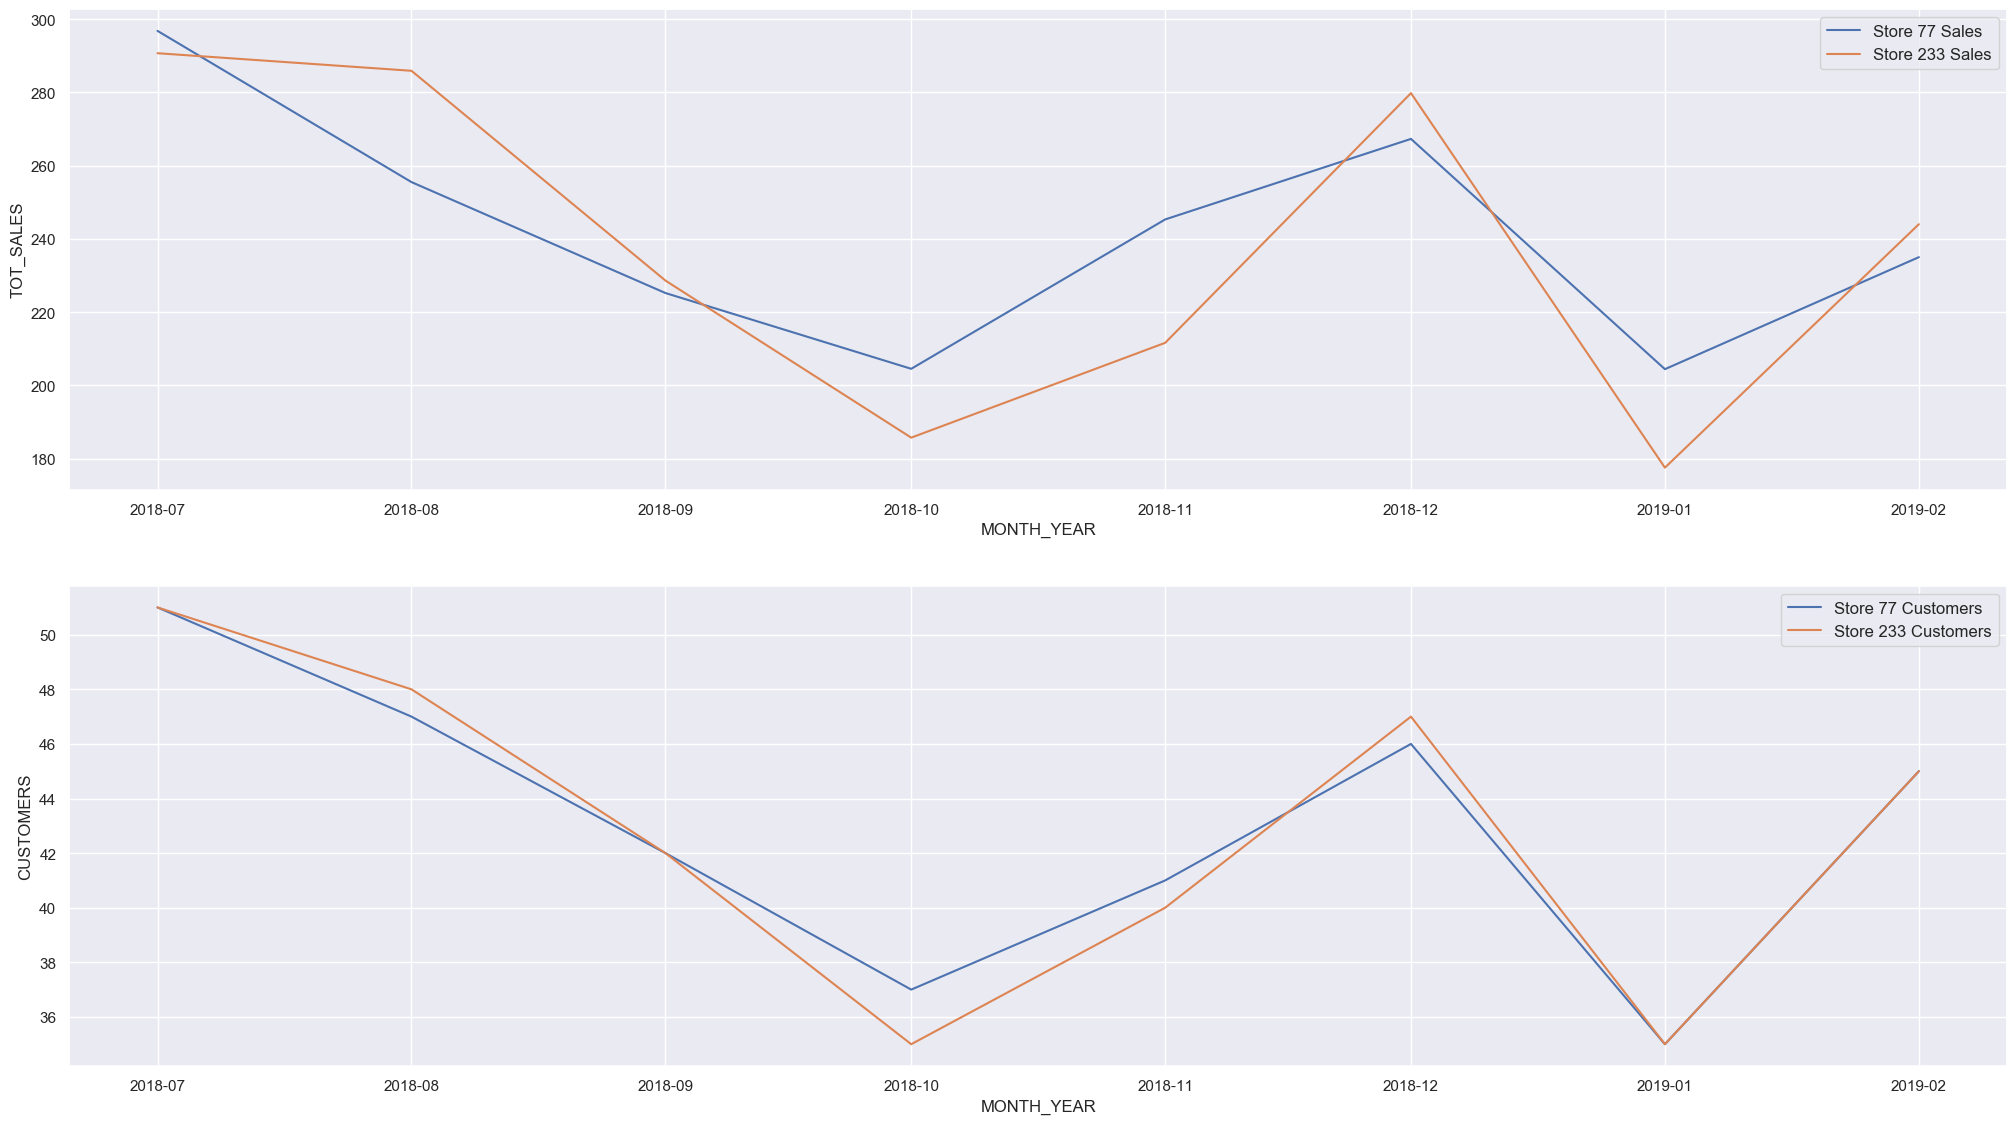

In [55]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(25,14), dpi=100)
sns.lineplot(x=store_prefeb[store_premarch['STORE_NBR']==77]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==77]['TOT_SALES'], legend='full', label="Store 77 Sales", ax=ax1)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==233]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==233]['TOT_SALES'], legend='full', label="Store 233 Sales", ax=ax1)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==77]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==77]['CUSTOMERS'], legend='full', label="Store 77 Customers", ax=ax2)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==233]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==233]['CUSTOMERS'], legend='full', label="Store 233 Customers", ax=ax2)

ax1.legend(loc="best", fontsize='medium')
ax2.legend(loc="best", fontsize='medium')

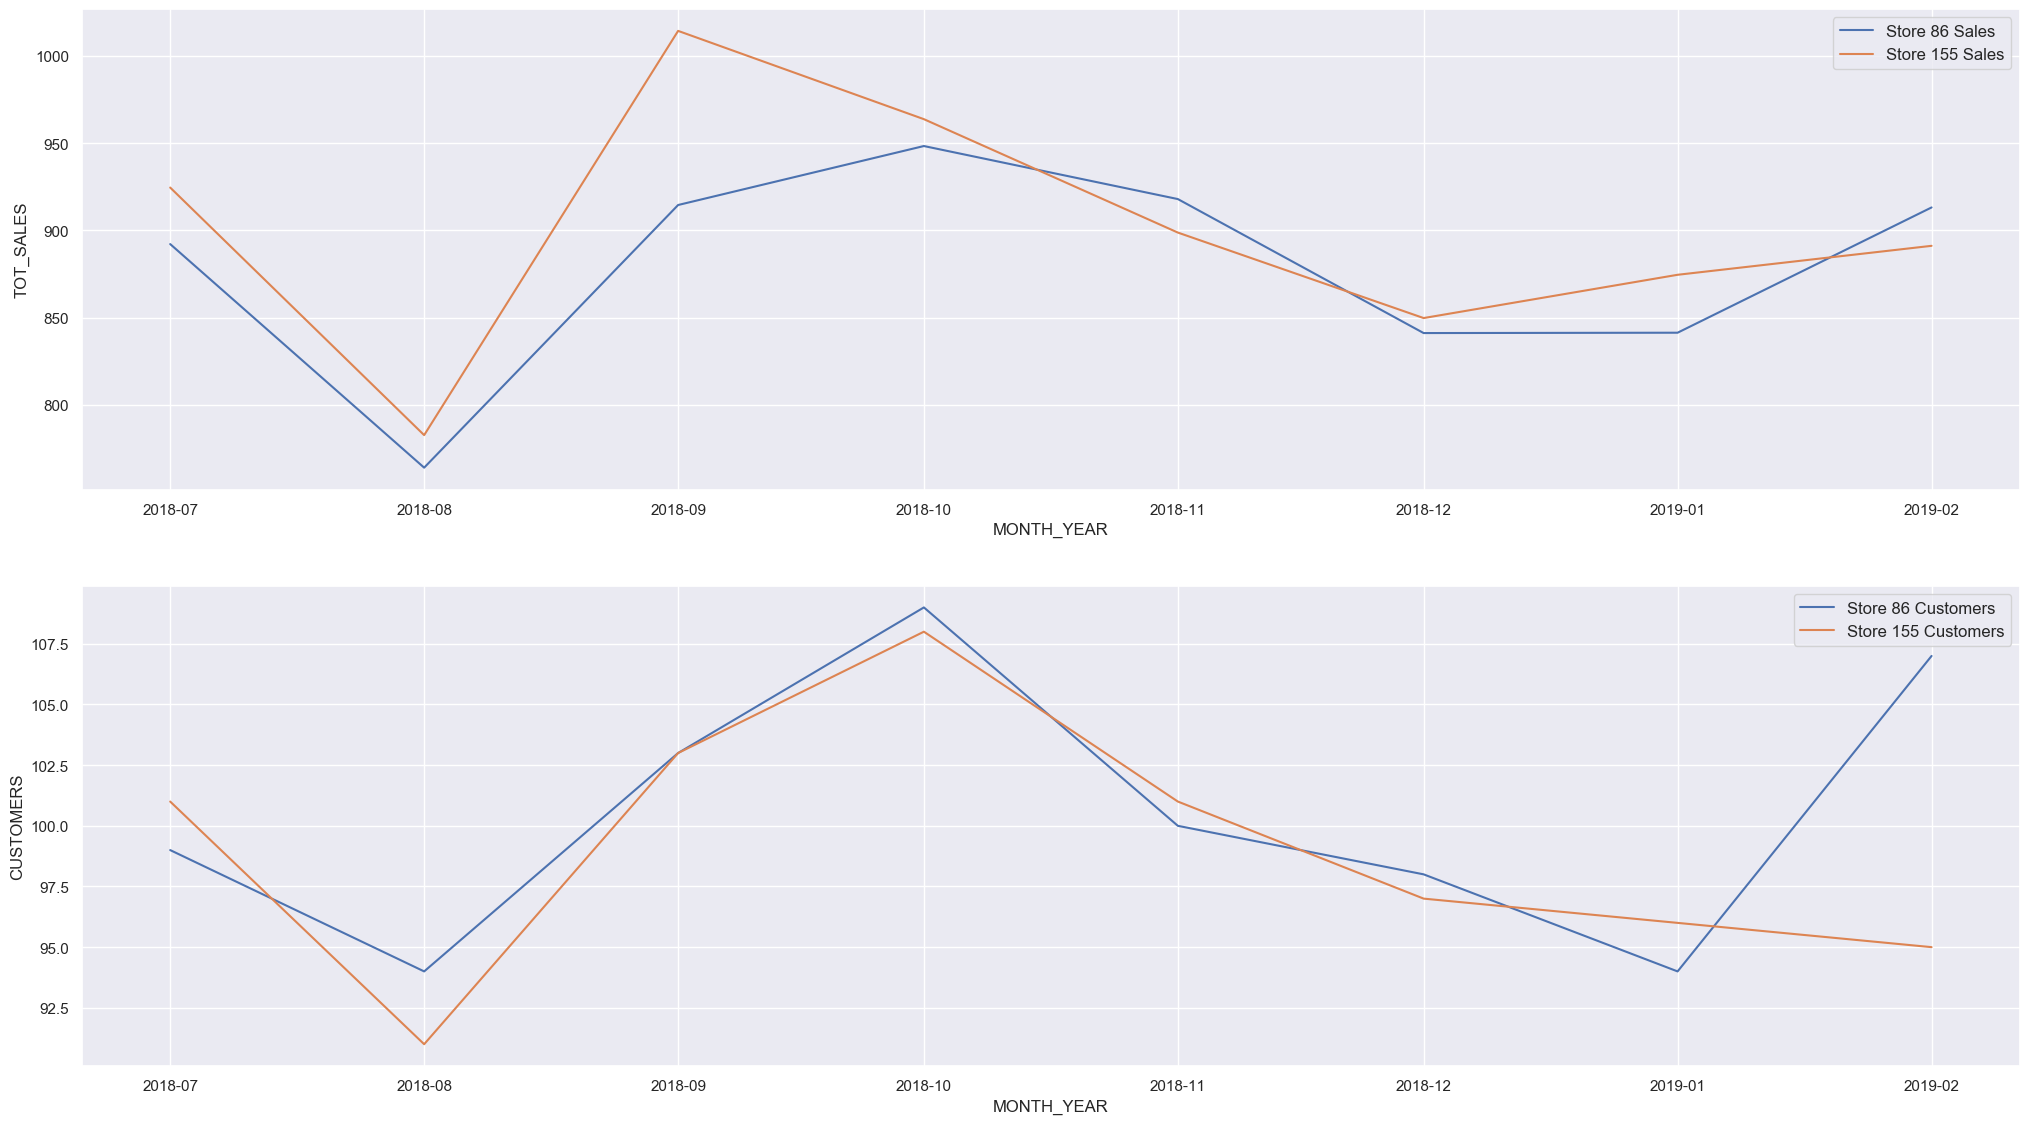

In [56]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(25,14), dpi=100)
sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==86]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==86]['TOT_SALES'], legend='brief', label="Store 86 Sales", ax=ax1)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==155]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==155]['TOT_SALES'], legend='brief', label="Store 155 Sales", ax=ax1)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==86]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==86]['CUSTOMERS'], legend='brief', label="Store 86 Customers", ax=ax2)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==155]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==155]['CUSTOMERS'], legend='brief', label="Store 155 Customers", ax=ax2)

ax1.legend(loc="best", fontsize='medium')
ax2.legend(loc="best", fontsize='medium')

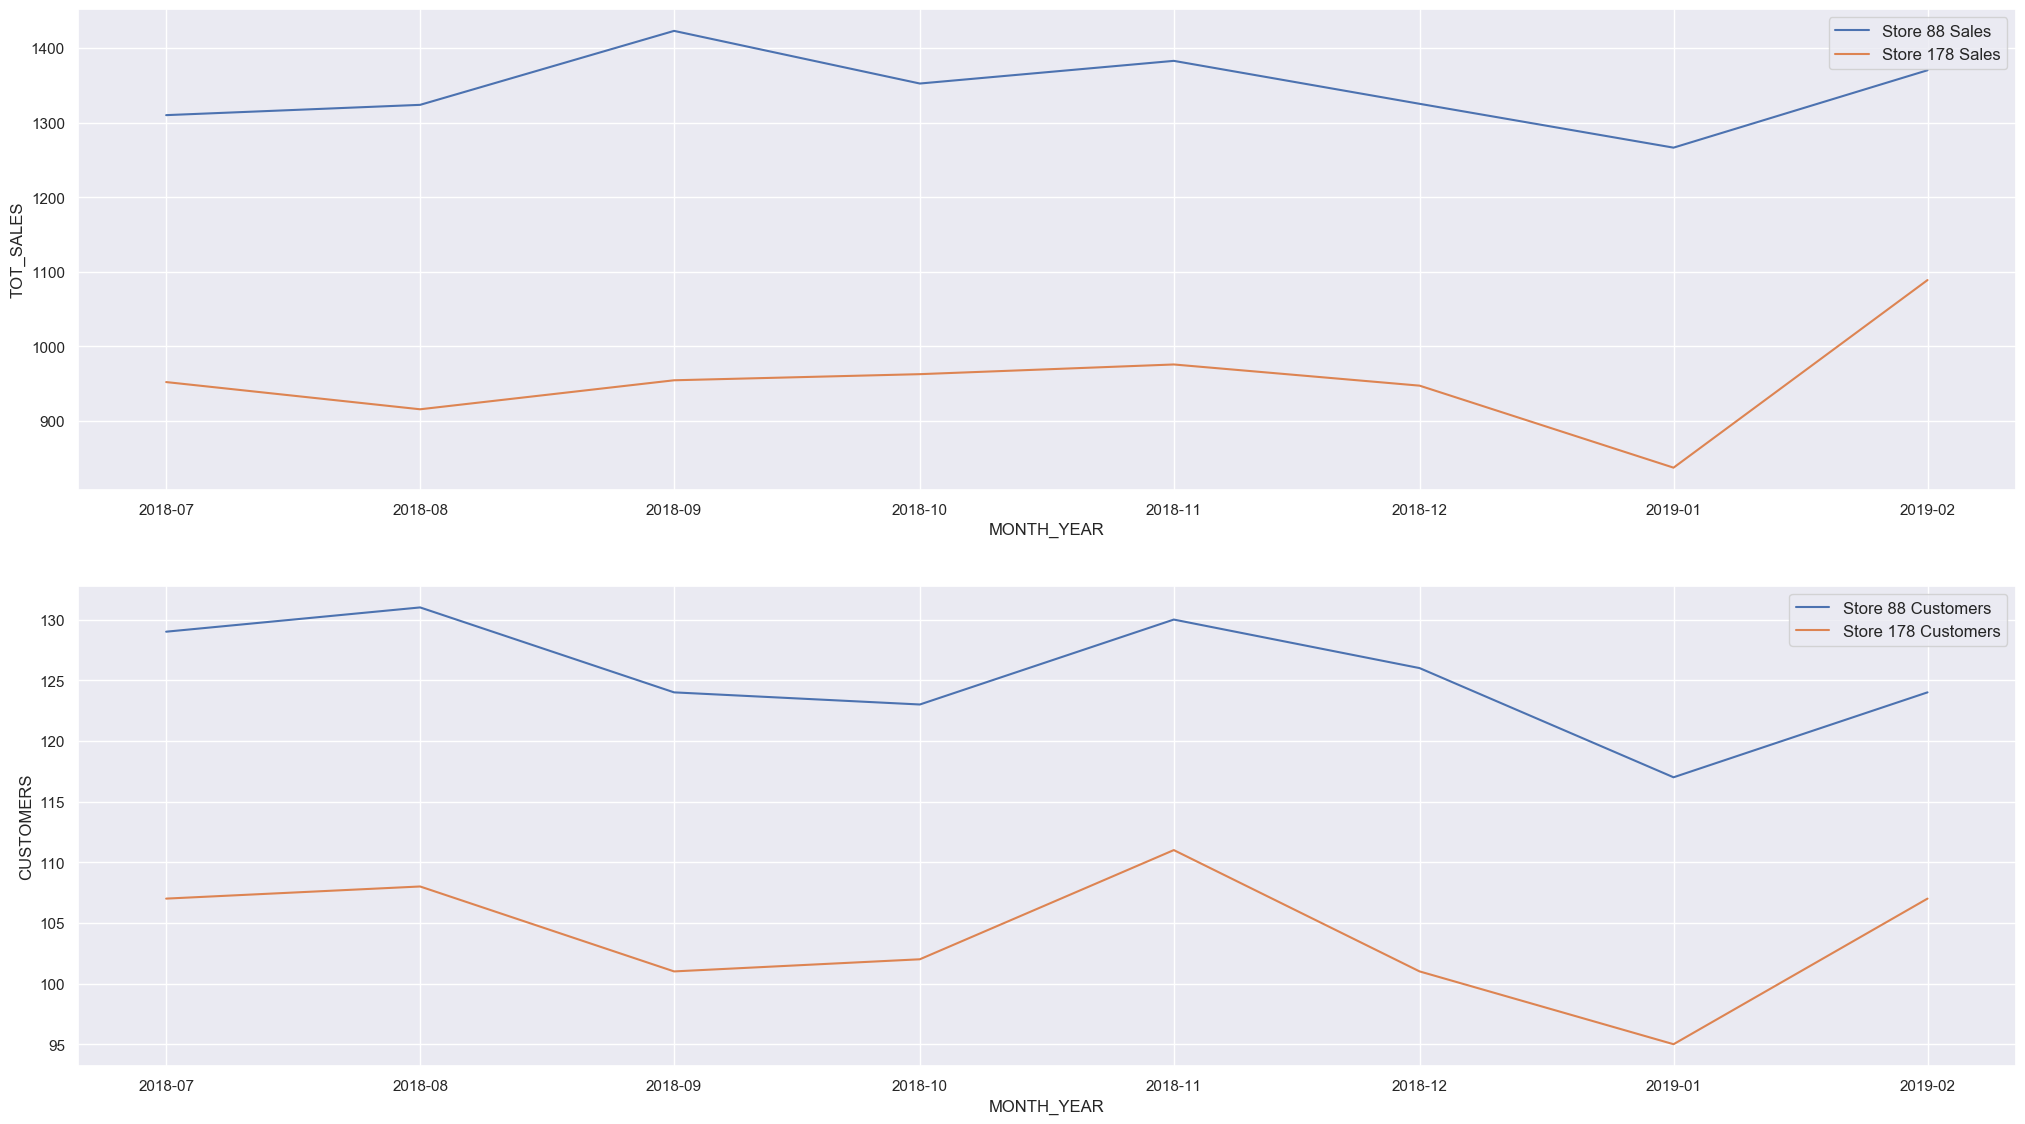

In [57]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(25,14), dpi=100)
sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==88]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==88]['TOT_SALES'], legend='brief', label="Store 88 Sales", ax=ax1)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==178]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==178]['TOT_SALES'], legend='brief', label="Store 178 Sales", ax=ax1)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==88]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==88]['CUSTOMERS'], legend='brief', label="Store 88 Customers", ax=ax2)

sns.lineplot(x=store_prefeb[store_prefeb['STORE_NBR']==178]['MONTH_YEAR'],
             y=store_prefeb[store_prefeb['STORE_NBR']==178]['CUSTOMERS'], legend='brief', label="Store 178 Customers", ax=ax2)

ax1.legend(loc="best", fontsize='medium')
ax2.legend(loc="best", fontsize='medium')

In [58]:
def scale_factor(trial_store, control_store):
    num = store_prefeb[store_prefeb['STORE_NBR']==trial_store]['TOT_SALES'].sum()
    den = store_prefeb[store_prefeb['STORE_NBR']==control_store]['TOT_SALES'].sum()
    return num/den

In [63]:
scale_factor(77, 233)

1.023617303289553

In [60]:
scale_factor(86, 155)

0.9700651481287746

In [61]:
scale_factor(88, 178)

1.4338146535258616

In [62]:
def controlled_df(df, trial_store, control_store):
    scale = scale_factor(trial_store, control_store)
    df_control = df[df['STORE_NBR']==control_store]
    df_control['CONTROL_SALES'] = df_control['TOT_SALES']*scale
    return df_control

In [67]:
control_77 = controlled_df(store_mdata, 77, 233)
control_77.head()

,MONTH_YEAR,STORE_NBR,TOT_SALES,CUSTOMERS,TXNS,AV_TXN,CHIP_QTY,AV_CHIP_QTY,AV_PRICE,CONTROL_SALES
2699,2018-07-01,233,290.7,51,54,1.058824,88,1.629630,3.303409,297.565550
2700,2018-08-01,233,285.9,48,50,1.041667,80,1.600000,3.573750,292.652187
2701,2018-09-01,233,228.6,42,45,1.071429,70,1.555556,3.265714,233.998916
2702,2018-10-01,233,185.7,35,36,1.028571,56,1.555556,3.316071,190.085733
2703,2018-11-01,233,211.6,40,41,1.025000,62,1.512195,3.412903,216.597421


In [68]:
control_86 = controlled_df(store_mdata, 86, 155)
control_86.head()

,MONTH_YEAR,STORE_NBR,TOT_SALES,CUSTOMERS,TXNS,AV_TXN,CHIP_QTY,AV_CHIP_QTY,AV_PRICE,CONTROL_SALES
989,2018-07-01,155,924.6,101,123,1.217822,250,2.032520,3.698400,896.922236
990,2018-08-01,155,782.7,91,119,1.307692,229,1.924370,3.417904,759.269991
991,2018-09-01,155,1014.4,103,144,1.398058,290,2.013889,3.497931,984.034086
992,2018-10-01,155,963.8,108,136,1.259259,272,2.000000,3.543382,934.948790
993,2018-11-01,155,898.8,101,133,1.316832,270,2.030075,3.328889,871.894555


In [69]:
control_88 = controlled_df(store_mdata, 88, 178)
control_88.head()

,MONTH_YEAR,STORE_NBR,TOT_SALES,CUSTOMERS,TXNS,AV_TXN,CHIP_QTY,AV_CHIP_QTY,AV_PRICE,CONTROL_SALES
2069,2018-07-01,178,952.0,107,131,1.224299,264,2.015267,3.606061,1364.991550
2070,2018-08-01,178,915.5,108,133,1.231481,253,1.902256,3.618577,1312.657315
2071,2018-09-01,178,954.4,101,128,1.267327,266,2.078125,3.587970,1368.432705
2072,2018-10-01,178,962.6,102,141,1.382353,290,2.056738,3.319310,1380.189985
2073,2018-11-01,178,975.6,111,138,1.243243,278,2.014493,3.509353,1398.829576


In [75]:
def difference (df, control_df, trial_store):
    trial_df = df[df['STORE_NBR']==trial_store]
    diff_df = pd.merge(control_df['CONTROL_SALES'], trial_df['TOT_SALES'],
                       left_on=control_df['MONTH_YEAR'], right_on=trial_df['MONTH_YEAR'])
    diff_df['% DIFFERENCE'] = (abs(diff_df['CONTROL_SALES']-diff_df['TOT_SALES'])/diff_df['CONTROL_SALES'])*100
    return diff_df

In [76]:
diff_77 = difference(store_mdata, control_77, 77)
diff_77

,key_0,CONTROL_SALES,TOT_SALES,% DIFFERENCE
0,2018-07-01,297.565550,296.8,0.257271
1,2018-08-01,292.652187,255.5,12.694997
2,2018-09-01,233.998916,225.2,3.760238
3,2018-10-01,190.085733,204.5,7.583035
4,2018-11-01,216.597421,245.3,13.251579
5,2018-12-01,286.408121,267.3,6.671641
6,2019-01-01,181.692071,204.4,12.498029
7,2019-02-01,249.762622,235.0,5.910661
8,2019-03-01,203.802205,278.5,36.652103
9,2019-04-01,162.345704,263.5,62.307960


In [77]:
diff_86 = difference(store_mdata, control_86, 86)
diff_86

,key_0,CONTROL_SALES,TOT_SALES,% DIFFERENCE
0,2018-07-01,896.922236,892.20,0.526493
1,2018-08-01,759.269991,764.05,0.629553
2,2018-09-01,984.034086,914.60,7.056065
3,2018-10-01,934.948790,948.40,1.438711
4,2018-11-01,871.894555,918.00,5.287961
5,2018-12-01,824.361363,841.20,2.042628
6,2019-01-01,848.418979,841.40,0.827301
7,2019-02-01,864.522060,913.20,5.630619
8,2019-03-01,780.320405,1026.80,31.586973
9,2019-04-01,819.317024,848.20,3.525250


In [78]:
diff_88 = difference(store_mdata, control_88, 88)
diff_88

,key_0,CONTROL_SALES,TOT_SALES,% DIFFERENCE
0,2018-07-01,1364.991550,1310.00,4.028710
1,2018-08-01,1312.657315,1323.80,0.848865
2,2018-09-01,1368.432705,1423.00,3.987576
3,2018-10-01,1380.189985,1352.40,2.013490
4,2018-11-01,1398.829576,1382.80,1.145928
5,2018-12-01,1358.109240,1325.20,2.423166
6,2019-01-01,1200.389628,1266.40,5.499079
7,2019-02-01,1561.137395,1370.20,12.230659
8,2019-03-01,1432.094076,1477.20,3.149648
9,2019-04-01,1519.556770,1439.40,5.275010
